Load the IMDB dataset.

In [2]:
from keras.datasets import imdb

Using TensorFlow backend.


The variables train_data and test_data are lists of movie reviews. Each review is a
list of word indices (encoding a sequence of words). train_labels and test_labels
are lists of 0's and 1's. 0 stands for "negative" and 1 stands for "positive".

The argument nb_words=10000 means to only keep the 10,000 most frequently occurring words in the training data.

In [3]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(nb_words=10000)

Here's the first record in train_data....

In [4]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

And the first label in train_labels....

In [5]:
train_labels[0]

1

We can't feed lists of integers into a neural network. The lists must be converted to tensors. Here's one approach to do that.

In [6]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    # first initialize a tensor of shape (len(sequences), dimension) with all zeros
    results = np.zeros((len(sequences), dimension))
    
    # now loop through and set integers (i.e. words) to 1.
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1. 
    
    return results

# vectorized training data
x_train = vectorize_sequences(train_data)

# vectorized test data
x_test = vectorize_sequences(test_data)

Here's the first integer sequence encoded into a binary tensor.

In [7]:
x_train[0]

array([ 0.,  1.,  1., ...,  0.,  0.,  0.])

We also need to vectorize the labels.

In [8]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

Now we can create a network model. In this example, we'll try two intermediate layers with 16 hidden units each, and a third layer which will output the scalar prediction of the sentiment (positive or negative) of the current review. The intermediate layers will use relu as the activation function. The final layer will use sigmoid activation to generate a probability (a score between 0 and 1) which indicates how likely the sample is be a positive review (the closer the score is to 1, the higher the probability that the review is positive).

In [9]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(16, activation='relu', input_dim=10000))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

We also need to select a loss function and an optimizer for the network. We'll choose the rmsprop optimizer and the binary_crossentropy loss function. We also want to measure accuracy.

In [10]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

We'll also configure the optimizer.

In [11]:
from keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

We also want binary accuracy.

In [12]:
from keras.objectives import binary_crossentropy
from keras.metrics import binary_accuracy

model.compile(optimizer=RMSprop(lr=0.001), loss=binary_crossentropy, metrics=[binary_accuracy])

Now we'll create a set of validation data by with 10,000 samples from the original training data.

In [13]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

Now we'll train our model for 20 epochs (i.e., 20 iterations over all samples in the x_train and y_train tensors), in batches of 512 samples. We'll also monitor loss and accuracy on the 10,000 samples by passing the validation data as the validation_data argument.

In [17]:
history = model.fit(partial_x_train, partial_y_train, nb_epoch=20, batch_size=512, validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s - loss: 0.5036 - binary_accuracy: 0.7887 - val_loss: 0.3850 - val_binary_accuracy: 0.8691
Epoch 2/20
15000/15000 [==============================] - 2s - loss: 0.3012 - binary_accuracy: 0.9044 - val_loss: 0.3293 - val_binary_accuracy: 0.8714
Epoch 3/20
15000/15000 [==============================] - 2s - loss: 0.2232 - binary_accuracy: 0.9263 - val_loss: 0.2771 - val_binary_accuracy: 0.8934
Epoch 4/20
15000/15000 [==============================] - 2s - loss: 0.1753 - binary_accuracy: 0.9452 - val_loss: 0.2731 - val_binary_accuracy: 0.8922
Epoch 5/20
15000/15000 [==============================] - 2s - loss: 0.1447 - binary_accuracy: 0.9543 - val_loss: 0.2803 - val_binary_accuracy: 0.8890
Epoch 6/20
15000/15000 [==============================] - 1s - loss: 0.1161 - binary_accuracy: 0.9652 - val_loss: 0.2974 - val_binary_accuracy: 0.8856
Epoch 7/20
15000/15000 [====================

Now we can look at the training metrics.

In [18]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'loss', 'val_binary_accuracy', 'binary_accuracy'])

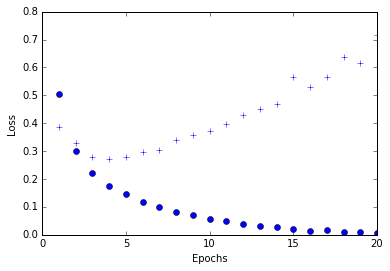

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo')
plt.plot(epochs, val_loss_values, 'b+')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

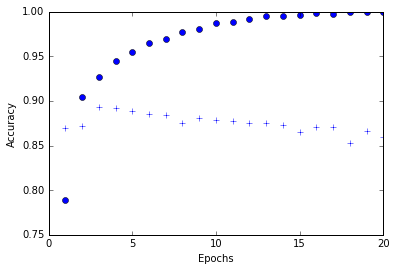

In [21]:
plt.clf() 

acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']
plt.plot(epochs, acc_values, 'bo')
plt.plot(epochs, val_acc_values, 'b+')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

The graphs above show that the network is overfitting the training data after the fourth epoch. We'll try re-running the network with only four epochs this time.

In [22]:
model = Sequential()

model.add(Dense(16, activation='relu', input_dim=10000))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, nb_epoch=4, batch_size=512)

results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 2s - loss: 0.4678 - acc: 0.8231     
Epoch 2/4
25000/25000 [==============================] - 2s - loss: 0.2708 - acc: 0.9084     
Epoch 3/4
25000/25000 [==============================] - 2s - loss: 0.2076 - acc: 0.9271     
Epoch 4/4
24992/25000 [============================>.] - ETA: 0s

In [23]:
results

[0.2918469704437256, 0.88532]

We can see each prediction in the test data. The closer the score is to 1, the higher the probability that the review is positive.

In [24]:
model.predict(x_test)

array([[ 0.93180436],
       [ 0.80974817],
       [ 0.99873918],
       ..., 
       [ 0.57409382],
       [ 0.00224084],
       [ 0.76358223]], dtype=float32)